In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

In [2]:
sales = pd.read_csv('../../original_data/sales_train.csv.gz')
shops = pd.read_csv('../../original_data/shops.csv')
items = pd.read_csv('../../original_data/items.csv')
test = pd.read_csv('../../original_data/test.csv.gz')
item_cats = pd.read_csv('../../original_data/item_categories.csv')

In [3]:
train1 = sales.merge(items).merge(item_cats).merge(shops)

# todo 

- fix '!' in shop_name and corresponding id **done**
- Жуковский ул. Чкалова 39м? (id ) and Жуковский ул. Чкалова 39м² (id ) are same **done**
- fix !Якутск ТЦ "Центральный" фран same as Якутск ТЦ "Центральный" **done**

- fix price outliers **done**
- fix item_cnt outliers? **done**
- item 17717 is "Acceptance of funds for 1C-Online"

In [4]:
train1

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,26.04.2013,3,59,944,150.00,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
2,26.06.2013,5,59,944,199.50,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
3,20.07.2013,6,59,944,199.50,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
4,14.09.2013,8,59,944,299.00,2.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
5,21.10.2013,9,59,944,299.00,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
6,02.11.2013,10,59,944,299.00,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
7,06.01.2014,12,59,944,299.00,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
8,30.03.2014,14,59,944,299.00,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
9,20.04.2014,15,59,944,199.00,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""


- shop_id 1 is same as 58
- shop_id 0 same as 57
- shop_id 10 same as 11

# shops 0 and 57 are the same place

In [5]:
print(train1[train1.shop_id==57].shop_name.head(1))
print(train1[train1.shop_id==0].shop_name.head(1))

1521667    Якутск Орджоникидзе, 56
Name: shop_name, dtype: object
1369576    !Якутск Орджоникидзе, 56 фран
Name: shop_name, dtype: object


In [6]:
train1.loc[train1.shop_id==0,'shop_name'] = 'Якутск Орджоникидзе, 56'
train1.loc[train1.shop_id==0,'shop_id'] = 57

# shops 1 and 58 are the same place

In [7]:
print(train1[train1.shop_id==58].shop_name.head(1))
print(train1[train1.shop_id==1].shop_name.head(1))

1646058    Якутск ТЦ "Центральный"
Name: shop_name, dtype: object
1363898    !Якутск ТЦ "Центральный" фран
Name: shop_name, dtype: object


In [8]:
train1.loc[train1.shop_id==1,'shop_name'] = 'Якутск ТЦ "Центральный"'
train1.loc[train1.shop_id==1,'shop_id'] = 58

# shops 10 and 11 are the same place

In [9]:
print(train1[train1.shop_id==10].shop_name.head(1))
print(train1[train1.shop_id==11].shop_name.head(1))

2642373    Жуковский ул. Чкалова 39м?
Name: shop_name, dtype: object
2885448    Жуковский ул. Чкалова 39м²
Name: shop_name, dtype: object


In [10]:
train1.loc[train1.shop_id==10,'shop_name'] = 'Жуковский ул. Чкалова 39м²'
train1.loc[train1.shop_id==10,'shop_id'] = 11

# check

In [11]:
np.sort(train1.shop_id.unique())

array([ 2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59], dtype=int64)

In [12]:
train1.shop_name.unique()

array(['Ярославль ТЦ "Альтаир"', 'Москва ТК "Буденовский" (пав.К7)',
       'Москва ТЦ "МЕГА Белая Дача II"', 'Москва ТРК "Атриум"',
       'Воронеж (Плехановская, 13)', 'Калуга ТРЦ "XXI век"',
       'Воронеж ТРЦ "Максимир"', 'Москва ТЦ "Семеновский"',
       'Химки ТЦ "Мега"', 'СПб ТК "Невский Центр"', 'Омск ТЦ "Мега"',
       'Новосибирск ТЦ "Мега"', 'Сергиев Посад ТЦ "7Я"',
       'Самара ТЦ "Мелодия"', 'Тюмень ТЦ "Зеленый Берег"',
       'Коломна ТЦ "Рио"', 'Якутск ТЦ "Центральный"',
       'Якутск Орджоникидзе, 56', 'Москва ТЦ "МЕГА Теплый Стан" II',
       'Москва ТК "Буденовский" (пав.А2)', 'Чехов ТРЦ "Карнавал"',
       'Н.Новгород ТРЦ "Фантастика"', 'Сургут ТРЦ "Сити Молл"',
       'Москва МТРЦ "Афи Молл"', 'Москва Магазин С21',
       'Курск ТЦ "Пушкинский"', 'Красноярск ТЦ "Июнь"',
       'Воронеж ТРЦ Сити-Парк "Град"', 'Москва ТЦ "Перловский"',
       'РостовНаДону ТЦ "Мега"', 'Самара ТЦ "ПаркХаус"',
       'Москва ТЦ "Серебряный Дом"', 'Москва ТЦ "Новый век" (Новокосино)'

# Fix price outliers

In [13]:
mean_prices = train1.groupby('item_id').item_price.mean()
train1['mean_item_price'] = train1['item_id'].map(mean_prices)

median_prices = train1.groupby('item_id').item_price.median()
train1['median_item_price'] = train1['item_id'].map(median_prices)

std_prices = train1.groupby('item_id').item_price.std()
train1['std_item_price'] = train1['item_id'].map(std_prices)

train1['std_over_mean'] = (train1.item_price - train1.mean_item_price)/train1.std_item_price

train1

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name,mean_item_price,median_item_price,std_item_price,std_over_mean
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",702.932203,999.000,336.466008,0.879934
1,26.04.2013,3,59,944,150.00,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",276.621489,290.510,101.942355,-1.242089
2,26.06.2013,5,59,944,199.50,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",276.621489,290.510,101.942355,-0.756521
3,20.07.2013,6,59,944,199.50,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",276.621489,290.510,101.942355,-0.756521
4,14.09.2013,8,59,944,299.00,2.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",276.621489,290.510,101.942355,0.219521
5,21.10.2013,9,59,944,299.00,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",276.621489,290.510,101.942355,0.219521
6,02.11.2013,10,59,944,299.00,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",276.621489,290.510,101.942355,0.219521
7,06.01.2014,12,59,944,299.00,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",276.621489,290.510,101.942355,0.219521
8,30.03.2014,14,59,944,299.00,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",276.621489,290.510,101.942355,0.219521
9,20.04.2014,15,59,944,199.00,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",276.621489,290.510,101.942355,-0.761425


In [14]:
item_counts = train1.groupby('item_id').item_price.count()
train1['item_count'] = train1.item_id.map(item_counts)
train1['threshold'] = -norm.ppf(1/(2*train1.item_count))
train1['toclip'] = (abs(train1.std_over_mean)>train1.threshold)
train1

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name,mean_item_price,median_item_price,std_item_price,std_over_mean,item_count,threshold,toclip
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",702.932203,999.000,336.466008,0.879934,59,2.387809,False
1,26.04.2013,3,59,944,150.00,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",276.621489,290.510,101.942355,-1.242089,517,3.100149,False
2,26.06.2013,5,59,944,199.50,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",276.621489,290.510,101.942355,-0.756521,517,3.100149,False
3,20.07.2013,6,59,944,199.50,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",276.621489,290.510,101.942355,-0.756521,517,3.100149,False
4,14.09.2013,8,59,944,299.00,2.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",276.621489,290.510,101.942355,0.219521,517,3.100149,False
5,21.10.2013,9,59,944,299.00,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",276.621489,290.510,101.942355,0.219521,517,3.100149,False
6,02.11.2013,10,59,944,299.00,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",276.621489,290.510,101.942355,0.219521,517,3.100149,False
7,06.01.2014,12,59,944,299.00,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",276.621489,290.510,101.942355,0.219521,517,3.100149,False
8,30.03.2014,14,59,944,299.00,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",276.621489,290.510,101.942355,0.219521,517,3.100149,False
9,20.04.2014,15,59,944,199.00,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",276.621489,290.510,101.942355,-0.761425,517,3.100149,False


In [15]:
np.mean(train1.toclip)

0.021061369300669073

In [16]:
train1.loc[train1.toclip,'item_price'] = train1.median_item_price

### titanfall is getting sold for 0.5 rubels a lot in month 18 for some reason

In [17]:
df = train1[(train1.item_id==7019)].sort_values('item_price')[['date_block_num','shop_id','item_id','item_price']]

In [18]:
with pd.option_context('display.max_rows',None):
    print(df)

         date_block_num  shop_id  item_id  item_price
9236                 18       59     7019       0.500
1415365              18       28     7019       0.500
1415364              18       28     7019       0.500
1415363              18       28     7019       0.500
1321277              18       16     7019       0.500
1321276              18       16     7019       0.500
1237331              18       44     7019       0.500
1176251              18       46     7019       0.500
1084833              18       38     7019       0.500
1084832              18       38     7019       0.500
1084831              18       38     7019       0.500
993575               18       42     7019       0.500
993574               18       42     7019       0.500
993573               18       42     7019       0.500
993572               18       42     7019       0.500
858744               18       54     7019       0.500
858743               18       54     7019       0.500
640031               18     

In [19]:
#there are some items with wild "variance" in price, (not mathematical variance)
int_items = [1856,1858,1851,5241,5243]
train1[train1.item_id.isin(int_items)].item_name.unique()

array(['Battlefield 4 Limited Edition [Xbox 360, русская версия]',
       'Battlefield 4 [Xbox 360, русская версия]',
       'Need for Speed Rivals [Xbox 360, русская версия]',
       'Battlefield 4 [PS3, русская версия]',
       'Need for Speed Rivals [PS3, русская версия]'], dtype=object)

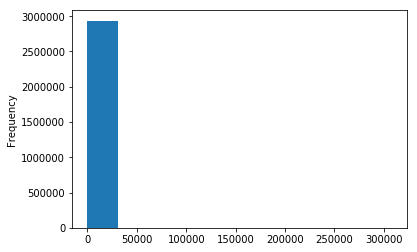

In [20]:
#train1.item_price.plot(kind='hist')

### check

In [21]:
#train1[['item_price','toclip','median_item_price']]

In [22]:
train1 = train1.drop(['mean_item_price','std_item_price','std_over_mean','item_count','threshold','toclip','median_item_price'],axis=1)

# item_cnt_day

item id 11373 has 1 outlier when it was recorded that 2169 were sold on a single day, reset this to the median

In [23]:
train1[train1.item_id==11373].sort_values('item_cnt_day',ascending=False)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
2694327,28.10.2015,33,12,11373,0.908714,2169.0,Доставка до пункта выдачи (Boxberry),9,Доставка товара,Интернет-магазин ЧС
2694220,19.05.2015,28,12,11373,155.192950,539.0,Доставка до пункта выдачи (Boxberry),9,Доставка товара,Интернет-магазин ЧС
2693951,22.11.2013,10,12,11373,102.466942,242.0,Доставка до пункта выдачи (Boxberry),9,Доставка товара,Интернет-магазин ЧС
2694209,16.04.2015,27,12,11373,120.120370,108.0,Доставка до пункта выдачи (Boxberry),9,Доставка товара,Интернет-магазин ЧС
2693954,29.11.2013,10,12,11373,72.200000,105.0,Доставка до пункта выдачи (Boxberry),9,Доставка товара,Интернет-магазин ЧС
2694033,27.05.2014,16,12,11373,214.134021,97.0,Доставка до пункта выдачи (Boxberry),9,Доставка товара,Интернет-магазин ЧС
2694256,06.07.2015,30,12,11373,98.947368,95.0,Доставка до пункта выдачи (Boxberry),9,Доставка товара,Интернет-магазин ЧС
2694123,13.11.2014,22,12,11373,159.952381,84.0,Доставка до пункта выдачи (Boxberry),9,Доставка товара,Интернет-магазин ЧС
2694300,29.09.2015,32,12,11373,152.353846,65.0,Доставка до пункта выдачи (Boxberry),9,Доставка товара,Интернет-магазин ЧС
2694205,14.04.2015,27,12,11373,711.688525,61.0,Доставка до пункта выдачи (Boxberry),9,Доставка товара,Интернет-магазин ЧС


# actually delete instread

In [24]:
train1[(train1.item_cnt_day==2169)&(train1.item_id==11373)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
2694327,28.10.2015,33,12,11373,0.908714,2169.0,Доставка до пункта выдачи (Boxberry),9,Доставка товара,Интернет-магазин ЧС


In [25]:
train1 = train1.drop(329130)

In [26]:
train1[train1.item_id==11373].sort_values('item_cnt_day',ascending=False)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
2694327,28.10.2015,33,12,11373,0.908714,2169.0,Доставка до пункта выдачи (Boxberry),9,Доставка товара,Интернет-магазин ЧС
2694220,19.05.2015,28,12,11373,155.192950,539.0,Доставка до пункта выдачи (Boxberry),9,Доставка товара,Интернет-магазин ЧС
2693951,22.11.2013,10,12,11373,102.466942,242.0,Доставка до пункта выдачи (Boxberry),9,Доставка товара,Интернет-магазин ЧС
2694209,16.04.2015,27,12,11373,120.120370,108.0,Доставка до пункта выдачи (Boxberry),9,Доставка товара,Интернет-магазин ЧС
2693954,29.11.2013,10,12,11373,72.200000,105.0,Доставка до пункта выдачи (Boxberry),9,Доставка товара,Интернет-магазин ЧС
2694033,27.05.2014,16,12,11373,214.134021,97.0,Доставка до пункта выдачи (Boxberry),9,Доставка товара,Интернет-магазин ЧС
2694256,06.07.2015,30,12,11373,98.947368,95.0,Доставка до пункта выдачи (Boxberry),9,Доставка товара,Интернет-магазин ЧС
2694123,13.11.2014,22,12,11373,159.952381,84.0,Доставка до пункта выдачи (Boxberry),9,Доставка товара,Интернет-магазин ЧС
2694300,29.09.2015,32,12,11373,152.353846,65.0,Доставка до пункта выдачи (Boxberry),9,Доставка товара,Интернет-магазин ЧС
2694205,14.04.2015,27,12,11373,711.688525,61.0,Доставка до пункта выдачи (Boxberry),9,Доставка товара,Интернет-магазин ЧС


## Downcast data

In [27]:
#function to downcast data types to 32 bits
def downcast(df):
    float_cols = [col for col in df if df[col].dtype=='float64']
    int_cols = [col for col in df if df[col].dtype=='int64']

    df[float_cols] = df[float_cols].astype(np.float32)
    df[int_cols] = df[int_cols].astype(np.int32)
    
    return(df)

In [28]:
train1 = downcast(train1)

# Aggregate

In [29]:
train2 = train1.groupby(['date_block_num','shop_id','item_id','item_category_id','shop_name','item_name','item_category_name'],as_index=False).item_cnt_day.sum()
train2.columns = ['date_block_num','shop_id','item_id','item_category_id','shop_name','item_name','item_category_name','item_cnt_month']

,date_block_num,shop_id,item_id,item_category_id,shop_name,item_name,item_category_name,item_cnt_month
0,0,2,27,19,"Адыгея ТЦ ""Мега""","007 Legends [PS3, русская версия]",Игры - PS3,1.0
1,0,2,33,37,"Адыгея ТЦ ""Мега""",1+1 (BD),Кино - Blu-Ray,1.0
2,0,2,317,45,"Адыгея ТЦ ""Мега""",1С:Аудиокниги. Мединский В. Мифы о России. О р...,Книги - Аудиокниги 1С,1.0
3,0,2,438,45,"Адыгея ТЦ ""Мега""",1С:Аудиотеатр. Лучшие произведения русских пис...,Книги - Аудиокниги 1С,1.0
4,0,2,471,49,"Адыгея ТЦ ""Мега""",1С:Бухгалтерия 8 (ред.3.0) как на ладони. Изд ...,Книги - Методические материалы 1С,2.0


In [30]:
train1.to_csv('../../gen_data/train1.csv',index=False)
train2.to_csv('../../gen_data/train2.csv',index=False)